## 분류 모델 1번

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

데이터 로드 성공!
원본 데이터 크기: (284807, 31)

데이터셋 미리보기:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267

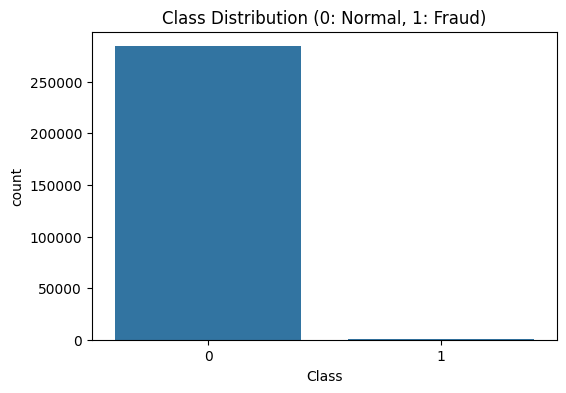

In [2]:
# 데이터 로드
try:
    df = pd.read_csv('data/creditcard.csv')
    print("데이터 로드 성공!")
except FileNotFoundError:
    print("Error: 'data/creditcard.csv' 파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")
    exit()

print(f"원본 데이터 크기: {df.shape}")
print("\n데이터셋 미리보기:")
print(df.head())

print("\n클래스(Class) 분포:")
print(df['Class'].value_counts())
print(f"정상 거래 비율: {df['Class'].value_counts()[0] / len(df) * 100:.2f}%")
print(f"사기 거래 비율: {df['Class'].value_counts()[1] / len(df) * 100:.2f}%")

# 불균형 시각화
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Normal, 1: Fraud)')
plt.show()

In [3]:
# 특성(X)과 레이블(y) 분리
X = df.drop('Class', axis=1)
y = df['Class']

print(f"\n특성 데이터(X) 크기: {X.shape}")
print(f"레이블 데이터(y) 크기: {y.shape}")


특성 데이터(X) 크기: (284807, 30)
레이블 데이터(y) 크기: (284807,)


In [4]:
# 데이터를 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\n학습 세트 크기 (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"테스트 세트 크기 (X_test, y_test): {X_test.shape}, {y_test.shape}")

print("\n학습 세트 Class 분포:")
print(y_train.value_counts(normalize=True))
print("\n테스트 세트 Class 분포:")
print(y_test.value_counts(normalize=True))


학습 세트 크기 (X_train, y_train): (199364, 30), (199364,)
테스트 세트 크기 (X_test, y_test): (85443, 30), (85443,)

학습 세트 Class 분포:
Class
0    0.998275
1    0.001725
Name: proportion, dtype: float64

테스트 세트 Class 분포:
Class
0    0.998268
1    0.001732
Name: proportion, dtype: float64


In [ ]:
# 데이터 스케일링
scaler = StandardScaler()

# 학습 세트에 fit_transform 적용
X_train_scaled = scaler.fit_transform(X_train)
# 테스트 세트에는 transform만 적용 (학습 세트의 평균과 표준편차를 사용)
X_test_scaled = scaler.transform(X_test)

# 스케일링된 데이터를 다시 DataFrame으로 변환 (선택 사항)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\n스케일링 후 X_train_scaled head():")
print(X_train_scaled.head())
print("\n스케일링 후 X_test_scaled head():")
print(X_test_scaled.head())


스케일링 후 X_train_scaled head():
       Time        V1        V2        V3        V4        V5        V6  \
0  1.257992 -0.005578  0.427819  0.108347 -0.534196  0.425864 -0.489116   
1  0.939713  0.904109 -0.110138 -1.449361  0.840920  0.442776 -0.760782   
2 -0.528960 -0.550544 -2.676901 -0.919977  0.331363 -1.496917 -0.573444   
3 -0.977583 -0.263360  0.619460 -0.403529 -0.551463  1.783666  2.495035   
4  0.725456 -0.325205  0.129183  0.187309 -1.261520  1.885635  3.011145   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0  0.676802 -0.000318 -0.169658  ... -0.048050 -0.313204 -0.788791  0.067073   
1  0.736596 -0.322162 -0.291515  ... -0.037888  0.379249  0.729482 -0.372721   
2  1.283049 -0.590546 -1.174846  ...  2.820226  0.467427 -1.973705 -1.756150   
3  0.037183  0.663671 -0.295311  ...  0.292249 -0.261482 -0.975989  0.231863   
4 -0.159076  0.782832  0.430014  ...  0.199993  0.226255  1.045051 -0.515334   

        V24       V25       V26      

In [6]:
# Logistic Regression 모델 초기화 및 학습
log_reg_model = LogisticRegression(solver='liblinear', random_state=42, n_jobs=-1) # n_jobs=-1은 모든 코어 사용
log_reg_model.fit(X_train_scaled, y_train)

print("\nLogistic Regression 모델 학습 완료!")

c:\project\py_project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(



Logistic Regression 모델 학습 완료!



--- 모델 평가 ---
정확도 (Accuracy): 0.9992
정밀도 (Precision): 0.8611
재현율 (Recall): 0.6284
F1-Score: 0.7266


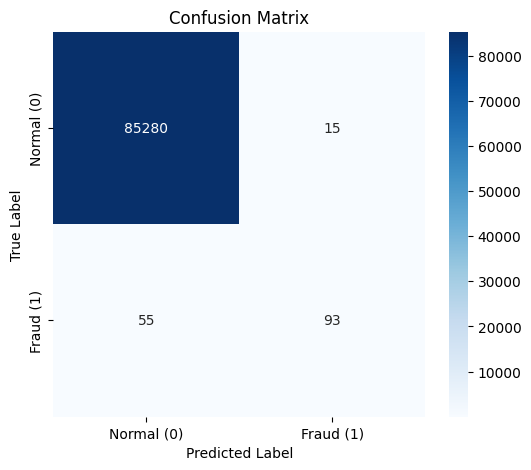


혼동 행렬:
TN (실제 정상, 예측 정상): 85280
FP (실제 정상, 예측 사기): 15
FN (실제 사기, 예측 정상): 55
TP (실제 사기, 예측 사기): 93


In [7]:
# 테스트 세트에 대한 예측 수행
y_pred = log_reg_model.predict(X_test_scaled)
y_proba = log_reg_model.predict_proba(X_test_scaled)[:, 1] # 사기(1)일 확률

# 평가 지표 출력
print("\n--- 모델 평가 ---")
print(f"정확도 (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print(f"정밀도 (Precision): {precision_score(y_test, y_pred):.4f}")
print(f"재현율 (Recall): {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal (0)', 'Fraud (1)'],
            yticklabels=['Normal (0)', 'Fraud (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\n혼동 행렬:")
print(f"TN (실제 정상, 예측 정상): {cm[0, 0]}")
print(f"FP (실제 정상, 예측 사기): {cm[0, 1]}")
print(f"FN (실제 사기, 예측 정상): {cm[1, 0]}")
print(f"TP (실제 사기, 예측 사기): {cm[1, 1]}")

### 결과 분석 및 고려사항

- 클래스 불균형: 초기 데이터 탐색에서 볼 수 있듯이, 사기 거래(Class=1)의 비율이 극히 낮다. (0.17% 정도)

- 정확도(Accuracy): 정확도는 전체 예측 중 올바르게 예측한 비율. 불균형 데이터에서는 정확도가 높게 나올 수 있지만, 이는 단순히 다수의 클래스(정상 거래)만 잘 맞춰도 높게 나올 수 있으므로 주의. 예를 들어, 모든 거래를 '정상'으로만 예측해도 99% 이상의 정확도.

- 정밀도(Precision): 모델이 '사기'라고 예측한 것들 중에서 실제로 사기인 비율입니다. 오탐(False Positive) 감소에 중요. (정상 거래를 사기로 잘못 판단하는 경우)

- 재현율(Recall): 실제 사기 거래 중에서 모델이 '사기'라고 올바르게 탐지한 비율. 미탐(False Negative)을 감소에 중요. (실제 사기 거래를 놓치는 경우)

- F1-Score: 정밀도와 재현율의 조화 평균. 둘 중 하나만 높고 다른 하나는 낮은 경우를 보정.

- 혼동 행렬(Confusion Matrix): 모델의 예측 결과를 2x2 테이블로 시각화하여 제시. 이를 통해 모델이 어떤 유형의 오류(False Positive, False Negative)를 범하는지 직관적으로 파악 가능. 특히 사기 탐지에서는 FN(실제 사기를 놓치는 것)의 비용이 매우 크므로, 재현율을 높이는 것이 중요한 경우가 다수.
    1. TN (True Negative): 실제 정상 거래를 정상으로 올바르게 예측한 수
    2. FP (False Positive): 실제 정상 거래를 사기로 잘못 예측한 수 (오탐)
    3. FN (False Negative): 실제 사기 거래를 정상으로 잘못 예측한 수 (미탐)
    4. TP (True Positive): 실제 사기 거래를 사기로 올바르게 예측한 수 (정탐)

<br><br><br>

## 분류 모델 2번

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

데이터 로드 성공!
원본 데이터 크기: (284807, 31)

데이터셋 미리보기:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267

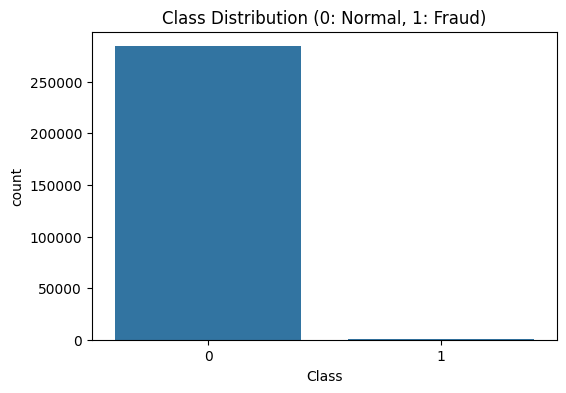

In [ ]:
# 데이터 로드 (위와 동일)
try:
    df = pd.read_csv('data/creditcard.csv')
    print("데이터 로드 성공!")
except FileNotFoundError:
    print("Error: 'data/creditcard.csv' 파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")
    exit()

print(f"원본 데이터 크기: {df.shape}")
print("\n데이터셋 미리보기:")
print(df.head())

print("\n클래스(Class) 분포:")
print(df['Class'].value_counts())
print(f"정상 거래 비율: {df['Class'].value_counts()[0] / len(df) * 100:.2f}%")
print(f"사기 거래 비율: {df['Class'].value_counts()[1] / len(df) * 100:.2f}%")

# 불균형 시각화
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Normal, 1: Fraud)')
plt.show()


In [10]:
# 특성(X)과 레이블(y) 분리
X = df.drop('Class', axis=1)
y = df['Class']

print(f"\n특성 데이터(X) 크기: {X.shape}")
print(f"레이블 데이터(y) 크기: {y.shape}")

# 데이터를 학습 세트(80%)와 테스트 세트(20%)로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n학습 세트 크기 (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"테스트 세트 크기 (X_test, y_test): {X_test.shape}, {y_test.shape}")

print("\n학습 세트 Class 분포:")
print(y_train.value_counts(normalize=True))
print("\n테스트 세트 Class 분포:")
print(y_test.value_counts(normalize=True))


특성 데이터(X) 크기: (284807, 30)
레이블 데이터(y) 크기: (284807,)

학습 세트 크기 (X_train, y_train): (227845, 30), (227845,)
테스트 세트 크기 (X_test, y_test): (56962, 30), (56962,)

학습 세트 Class 분포:
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64

테스트 세트 Class 분포:
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


In [11]:
# 데이터 스케일링
scaler = StandardScaler()

# 학습 세트에 fit_transform 적용하여 스케일러 학습 및 변환
X_train_scaled = scaler.fit_transform(X_train)
# 테스트 세트에는 transform만 적용 (학습 세트에서 학습된 평균과 표준편차 사용)
X_test_scaled = scaler.transform(X_test)

# 스케일링된 데이터를 다시 DataFrame으로 변환 (선택 사항이지만, 이해를 돕기 위함)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\n스케일링 후 X_train_scaled_df head():")
print(X_train_scaled_df.head())
print("\n스케일링 후 X_test_scaled_df head():")
print(X_test_scaled_df.head())


스케일링 후 X_train_scaled_df head():
       Time        V1        V2        V3        V4        V5        V6  \
0  1.411588  0.993379 -0.456037 -0.894052 -0.467284  1.089217  3.024383   
1  0.623141  1.038507 -0.029349 -2.018302  0.175133  2.133506  2.478840   
2 -1.130680 -0.506766  0.366065  0.470114 -0.700918 -0.598748  1.470411   
3  0.794699  1.166419 -0.909447 -0.493095 -1.178149 -1.010692 -0.262292   
4 -0.748102 -0.229485 -0.613041  0.076742 -2.440089  0.518711 -0.109914   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0 -1.194852  0.957057  1.281376  ... -0.173112  0.103171  0.409563  0.490685   
1 -0.001832  0.566704  0.041121  ... -0.293564  0.052055  0.314019  0.056568   
2 -1.786684 -4.227592  0.000064  ...  1.663010 -3.807987  0.150500 -0.695838   
3 -1.153123  0.008765 -1.019866  ... -0.635236 -0.190540  0.105701  0.331932   
4  0.407186 -0.095161 -0.041449  ... -0.355860 -0.331467 -0.239208 -0.010747   

        V24       V25       V26   

In [12]:
# KNN 모델 초기화 및 학습
# n_neighbors=5는 가장 가까운 5개의 이웃을 기준으로 분류
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1) # n_jobs=-1은 모든 CPU 코어 사용
knn_model.fit(X_train_scaled, y_train)

print("\nKNeighborsClassifier 모델 학습 완료!")


KNeighborsClassifier 모델 학습 완료!



--- 모델 성능 평가 ---
정확도 (Accuracy): 0.9995

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



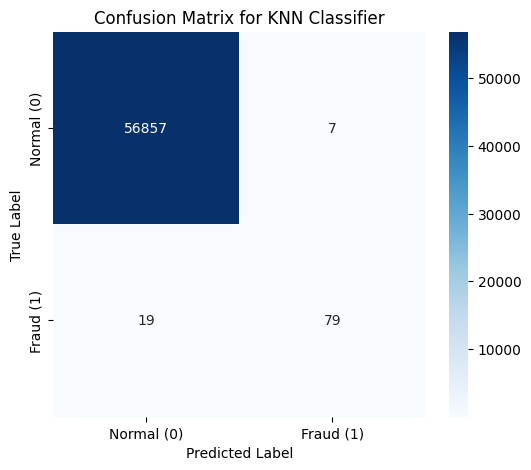


혼동 행렬:
TN (실제 정상, 예측 정상): 56857
FP (실제 정상, 예측 사기): 7
FN (실제 사기, 예측 정상): 19
TP (실제 사기, 예측 사기): 79


In [13]:
# 테스트 데이터에 대한 예측 수행
y_pred = knn_model.predict(X_test_scaled)

# 정확도 출력
print("\n--- 모델 성능 평가 ---")
print(f"정확도 (Accuracy): {accuracy_score(y_test, y_pred):.4f}")

# classification_report 출력 (정밀도, 재현율, F1-스코어 포함)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal (0)', 'Fraud (1)'],
            yticklabels=['Normal (0)', 'Fraud (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

print("\n혼동 행렬:")
print(f"TN (실제 정상, 예측 정상): {cm[0, 0]}")
print(f"FP (실제 정상, 예측 사기): {cm[0, 1]}")
print(f"FN (실제 사기, 예측 정상): {cm[1, 0]}")
print(f"TP (실제 사기, 예측 사기): {cm[1, 1]}")